In [1]:
#%%
import os
import FinanceDataReader as fdr
from bt.algos import RunDaily
from pypfopt.expected_returns import prices_from_returns
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quantstats as qs
import seaborn as sns
import sys

pd.options.display.float_format = '{:.4f}'.format
plt.style.use('default') #ggplot
plt.rcParams['font.family'] = 'nanummyeongjo'
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.grid'] = True

plt.rcParams['axes.formatter.useoffset'] = False
# plt.rcParmas['axes.formatter.limits'] = -1000, 1000

plt.rcParams['axes.unicode_minus'] = False

from IPython.display import display, HTML

# sys.path.insert(0, "/Users/hosung/workspace/git/bt/")
# for p in sys.path:
#     print(p)
%matplotlib inline

import bt
bt.__version__

(0, 2, 9)

In [2]:
def long_only_ew(data, tickers, start_date, name='long_only_ew', initial_capital=1000000.0):
    s = bt.Strategy(name,
    [
        bt.algos.RunAfterDate(start_date),
        bt.algos.RunOnce(),
        bt.algos.SelectThese(tickers),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ])
    return bt.Backtest(s, data, initial_capital=initial_capital)

In [3]:
df = pd.read_csv('/Users/hosung/workspace/git/docu/data/asset_db.csv', index_col=0, parse_dates=True)

In [4]:
cols = ['nasdaq100_UH', 'kbond20y', 'kodex200x2', 'usdkrwx2']
price_df = df[cols].copy()
#nasdaq100_UH 1985-10-02 00:00:00
#kbond20y 1981-05-01 00:00:00
#kodex200x2 1981-05-01 00:00:00
#usdkrwx2 1981-05-01 00:00:00


In [5]:
price_df = price_df.dropna()['2002-12-29':'2020-6']
start_date = '2003-6-27'

In [6]:
st = bt.Strategy("AIBeta",
                [
                    bt.algos.RunAfterDate(start_date),
                    bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=True),
                    bt.algos.PrintDate(),
                    bt.algos.SelectAll(),
                    bt.algos.WeighMeanVar(lookback=pd.DateOffset(months=6), lag = pd.DateOffset(days=1),
                                         bounds=(0.0, 0.5), covar_method='standard'),
                    bt.algos.Rebalance()
                ])
bt_ai_beta = bt.Backtest(st, price_df)

In [13]:
st_ERC = bt.Strategy("AIBeta_ERC",
                [
                    bt.algos.RunAfterDate(start_date),
                    bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=True),
                    # bt.algos.PrintDate(),
                    bt.algos.SelectAll(),
                    bt.algos.WeighERC(lookback=pd.DateOffset(months=6), lag = pd.DateOffset(days=1),
                                      covar_method='standard'),
                    bt.algos.Rebalance()
                ])
bt_ai_beta_ERC = bt.Backtest(st_ERC, price_df)

In [14]:
st_InvVol = bt.Strategy("AIBeta_InvVol",
                [
                    bt.algos.RunAfterDate(start_date),
                    bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=True),
                    # bt.algos.PrintDate(),
                    bt.algos.SelectAll(),
                    bt.algos.WeighInvVol(lookback=pd.DateOffset(months=6), lag = pd.DateOffset(days=1)),
                    bt.algos.Rebalance()
                ])
bt_ai_beta_InvVol = bt.Backtest(st_InvVol, price_df)

In [15]:
bt_ew = long_only_ew(price_df, cols, start_date, "ew")

bt_kodex200x2 = long_only_ew(price_df, ["kodex200x2"], start_date, "kodex200x2")
bt_kbond20y = long_only_ew(price_df, ["kbond20y"], start_date, "kbond20y")
bt_nasdaq100_UH = long_only_ew(price_df, ["nasdaq100_UH"], start_date, "nasdaq100_UH")
bt_usdkrwx2 = long_only_ew(price_df, ["usdkrwx2"], start_date, "usdkrwx2")

In [16]:
r = bt.run(bt_ai_beta, bt_ai_beta_ERC, bt_ai_beta_InvVol, bt_kodex200x2, bt_kbond20y, bt_nasdaq100_UH, bt_usdkrwx2)

In [17]:
r.set_date_range(start=start_date)
r.display()

Stat                 AIBeta      AIBeta_ERC    AIBeta_InvVol    kodex200x2    kbond20y    nasdaq100_UH    usdkrwx2
-------------------  ----------  ------------  ---------------  ------------  ----------  --------------  ----------
Start                2003-06-27  2003-06-27    2003-06-27       2003-06-27    2003-06-27  2003-06-27      2003-06-27
End                  2020-06-30  2020-06-30    2020-06-30       2020-06-30    2020-06-30  2020-06-30      2020-06-30
Risk-free rate       0.00%       0.00%         0.00%            0.00%         0.00%       0.00%           0.00%

Total Return         640.62%     324.46%       352.97%          386.03%       237.94%     769.84%         12.83%
Daily Sharpe         0.90        1.04          1.05             0.44          0.66        0.71            0.14
Daily Sortino        1.44        1.70          1.73             0.69          1.06        1.17            0.23
CAGR                 12.49%      8.87%         9.29%            9.74%         7.42%   

/Users/hosung/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1389: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


<AxesSubplot:>

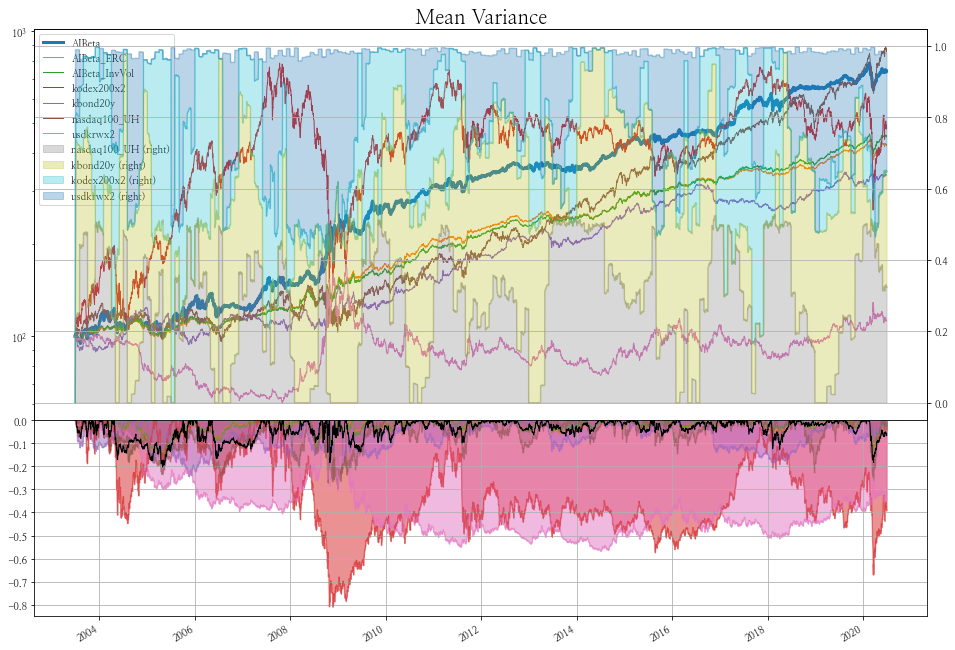

In [26]:
res1 = r
start = start_date
end = '2020-06-30'
plt.rcParams["figure.figsize"] = [16, 12]
plt.subplots_adjust(hspace=0)

# 첫번째 칸에 그림을 그린다.
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=2)
# 두개를 한 칸에 그리기 위해 ax=ax1으로 axis공유
ax2 = res1.prices[start:end].plot(ax=ax1, style=['-', '-', '-', '-', '-', '-', '-'], lw=1, logy=True) # 모든 데이터 r_all
for line in ax2.get_lines():
    if line.get_label() == 'AIBeta' or line.get_label() == 'AIBet_ERC' or line.get_label() == 'AIBet_InvVol':
        line.set_linewidth(3)
plt.legend(loc="upper left");
plt.title('Mean Variance', fontsize=20)
res1.get_security_weights('AIBeta')[start:end].plot.area(alpha=0.3, ax=ax1, secondary_y=True)


# 두번째 칸에 그림을 그린다.
# drawdown을 그림다. 두개를 하나에 그리기 위해 ax=ax2로 axis를 공유
ax2 = plt.subplot2grid((3,1), (2,0))
res1.prices[start:end].to_drawdown_series().plot.area(stacked=False,legend=False, ax=ax2)
res1.prices.loc[start:end,'AIBeta'].to_drawdown_series().plot(legend=False, color='black', alpha=1, lw=1, ls='-', ax=ax2)


In [22]:
r.display_monthly_returns('AIBeta')

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2003   0      0      0      0      0      0     -2.67   5.15  -4.26   6.85   1.2    4.17  10.37
  2004   3.87   2.84  -2.16  -1.8   -2.31  -0.61  -0.85   3.77   1.08  -1.5   -3.88   2.78   0.85
  2005  -7.72   7.93  -3.32  -7.86   8.93   0.1    9.28  -1.85   5.8   -6     10.02   3.73  17.77
  2006   0.85  -1.74  -0.59   4.2   -5.09  -3     -0.4    1.65   0.93  -1.05  -0.56  -0.88  -5.81
  2007  -0.72   1.42   1.6    4.13   7.88   0.75   5.94  -0.74  -0.48   4.38  -5.35   2.4   22.57
  2008  -2.28  -0.26   4.3    3.57  -0.46  -1.18  -2.94  10.55   8.67   6.29  13.39  -1.58  43.25
  2009   7.78   4.28  -7.63   1.22  -3.4    0.73  10.34   3.58   6.27  -5.34   0.57   5.85  25.14
  2010  -6.25   2.34   5.09   1.56  -2.47   1.67   0.93   3.6    3.49  -2.02   2.85   4.05  15.21
  2011  -0.84  -1.54

                           Strategy
-------------------------  ----------
Start Period               2003-06-30
End Period                 2020-06-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          640.62%
CAGR﹪                     12.49%

Sharpe                     0.9
Smart Sharpe               0.88
Sortino                    1.3
Smart Sortino              1.27
Sortino/√2                 0.92
Smart Sortino/√2           0.9
Omega                      1.19

Max Drawdown               -20.22%
Longest DD Days            526
Volatility (ann.)          14.45%
Calmar                     0.62
Skew                       -0.14
Kurtosis                   18.73

Expected Daily %           0.05%
Expected Monthly %         0.98%
Expected Yearly %          11.77%
Kelly Criterion            8.87%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.45%
Expected Shortfall (cVaR)  -1.45%

Gain/Pain Ratio            0.19
Gain/Pain (1M)             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2004-04-26,2005-04-28,2005-10-04,526,-20.2245,-19.2950
2,2008-10-28,2008-10-30,2009-01-08,72,-18.3061,-17.3790
3,2020-02-21,2020-03-23,2020-06-30,130,-18.2308,-17.2296
4,2006-05-12,2006-06-13,2007-05-30,383,-16.4615,-15.8312
5,2008-10-10,2008-10-14,2008-10-23,13,-13.8935,-11.6728


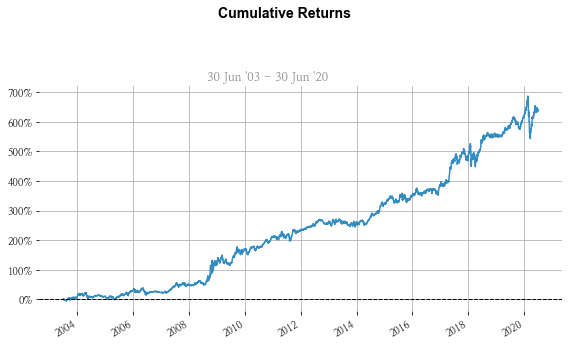

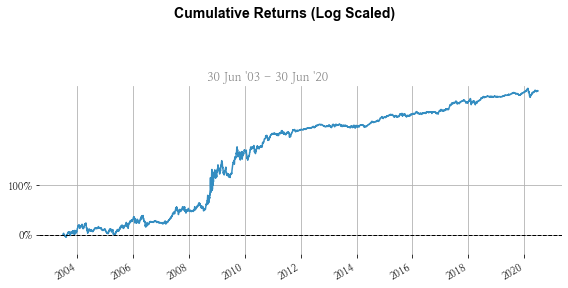

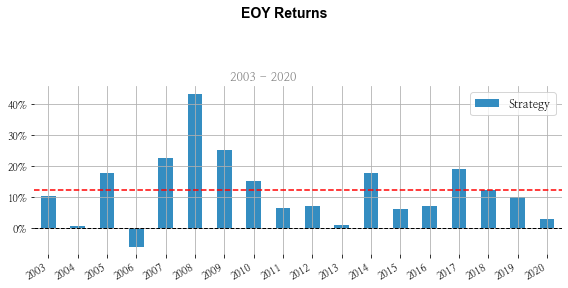

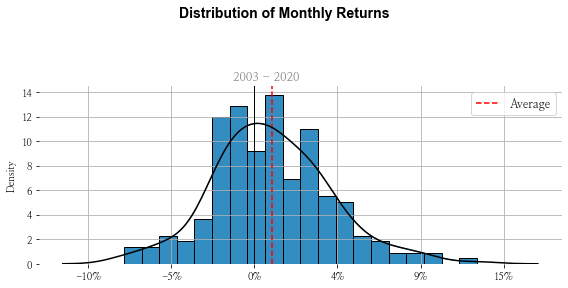

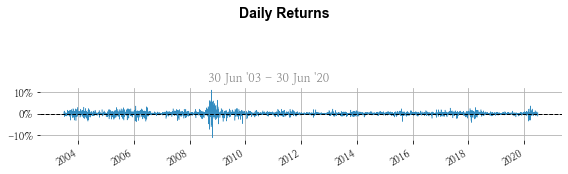

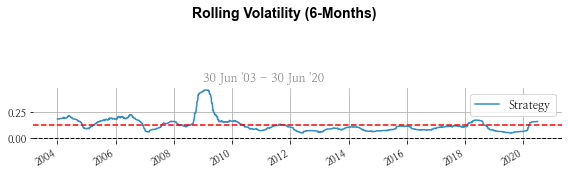

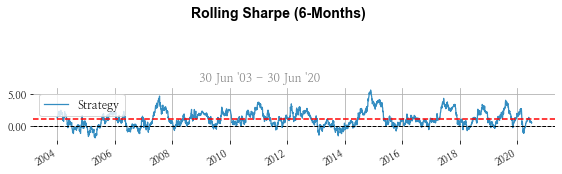

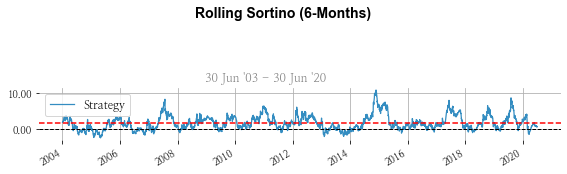

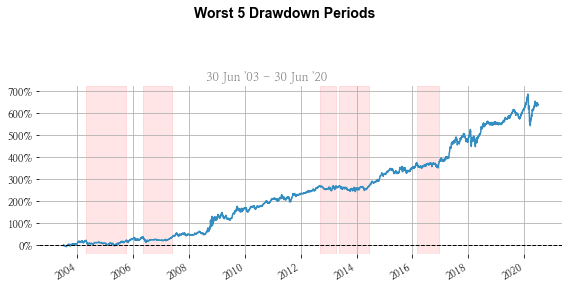

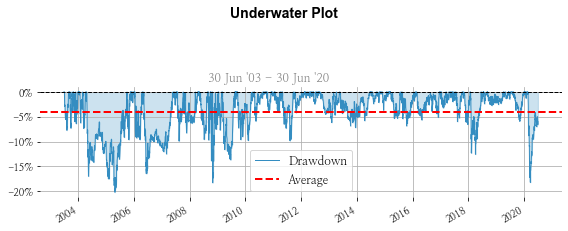

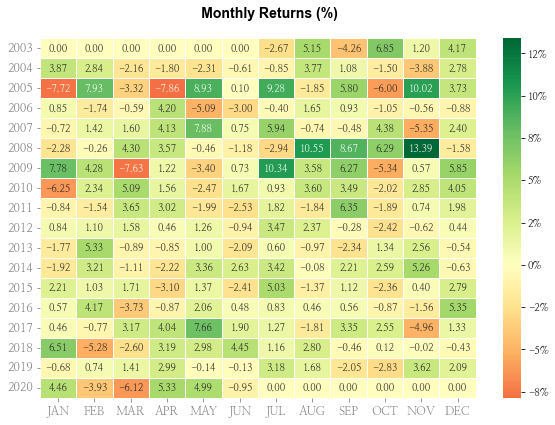

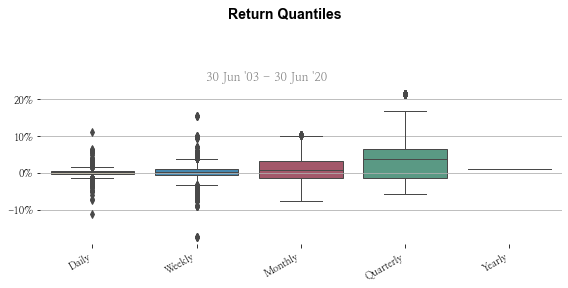

In [21]:
qs.reports.full(r.prices['AIBeta'].to_returns().dropna())